In [1]:
import cv2
import sys
import numpy as np 
import IPython
import os
from ipynb.fs.full.DF_VGG import *
from ipynb.fs.full.Metrics import *
import ipyplot
import scipy.io as sio
import pandas as pd

In [4]:
DataSet = "Corel-5k"
FDB=[]
IDB=[]
for clase in os.listdir(DataSet): 
    ruta = "{}/{}".format (DataSet, clase) 
    for archivo in os.listdir(ruta):
        imagen="{}/{}".format (ruta, archivo)
        vector=Get_DF_VGG16(imagen,"fc7")
        data=[clase, imagen]
        IDB.append(data)
        FDB.append(vector)
np.save("Db_VGG_5k.npy",FDB)
np.save("Db_VGG_Inf_5k.npy",IDB)

In [2]:
DataSet = "CorelDB"
FDB=[]
IDB=[]
for clase in os.listdir(DataSet): 
    ruta = "{}/{}".format (DataSet, clase) 
    for archivo in os.listdir(ruta):
        imagen="{}/{}".format (ruta, archivo)
        vector=[Get_DF_VGG16(imagen,"fc7")]
        data=[clase, imagen]
        FDB.append(vector)
        IDB.append(data)
np.save("Db_VGG_CBIR.npy",FDB)
np.save("Db_VGG_Inf_CBIR.npy",IDB)

In [39]:
DataSet = "Caltech-101"
FDB=[]
IDB=[]
for clase in os.listdir(DataSet): 
    ruta = "{}/{}".format (DataSet, clase) 
    for archivo in os.listdir(ruta):
        imagen="{}/{}".format (ruta, archivo)
        img = cv2.imread(imagen) 
        if img.shape[2] > 1:
            vector=Get_DF_VGG16(imagen,"fc7")
            data=[clase, imagen]
            IDB.append(data)
            FDB.append(vector)
np.save("Db_VGG_c101.npy",FDB)
np.save("Db_VGG_Inf_c101.npy",IDB)

In [3]:
FDB=np.load('Db_VGG_CBIR.npy')
IDB=np.load('Db_VGG_Inf_CBIR.npy')

In [6]:
np.shape(FDB)

(10800, 1, 4096)

In [36]:
np.insert(M,0,1,axis=0)

array([1.])

In [10]:
FDB[10799,:]

array([[-0.02088129, -0.01076743, -0.02929635, ..., -0.00527087,
        -0.02505613, -0.0007719 ]], dtype=float32)

In [23]:
np.shape(M)

(4096,)

In [50]:
IDB.pop(10813)

['woman', 'CorelDB/woman/Thumbs.db']

In [53]:
np.save("Db_VGG_Inf_CBIR.npy",IDB)

In [3]:
FDB=np.load('Db_VGG.npy')
IDB=np.load('Db_VGG_Inf.npy')

In [4]:
FDB[0][0]

-0.004219923

In [5]:
np.shape(IDB)

(1000, 2)

In [20]:
IDB[99][0]

'1'

In [70]:
len(FDB[0])

4096

# Ret random 

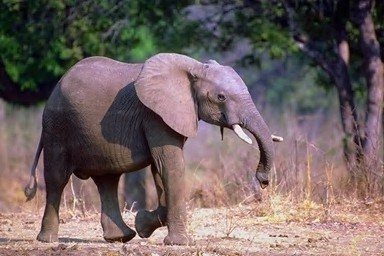

In [67]:
r=np.random.randint(len(FDB))
dif=[]
for n in range (len(FDB)):
    dif.append(np.linalg.norm(FDB[n] - FDB[r]))
images_array=[]
labels=[]
for i in range (100):
    minimo = min(dif)
    i_min = dif.index(minimo)
    #dif.pop(i_min)
    images_array.append(IDB[i_min][1])
    labels.append(minimo)
    dif[i_min]=max(dif)
display(IPython.display.Image(filename=IDB[r][1], height=50, width=100))
ipyplot.plot_images(images_array, labels, max_images=100, img_width=50)

M=np.zeros(10)
Mat=np.ones((5,5))

In [16]:
sum(Mat[1,:k+3])

3.0

In [17]:
Mat[0,0]=10

In [22]:
min(10,5)

5

In [2]:
mat = sio.loadmat('Corel-1k-RL.mat')

In [4]:
j=mat['Rand_List']

# Ret Ev

In [23]:
###########PONER LISTA DE CONSULTAS
#mat = sio.loadmat('Caltech-101-RL.mat')
#query=mat['Rand_List']
qRL=[]
FDB=np.load('Db_VGG_CBIR.npy')
IDB=np.load('Db_VGG_Inf_CBIR.npy')
Nr=12
###LEer el MAT donde vienen las random lis (RL) D:\Matlab\Proyecto_Tesis\Experiments\DataBase\"DBname"\Results
RDB=[]
RcDB=[]
#[Q, I]=np.shape(query)
[Clist, LR]=np.unique(IDB[:,0],return_counts=True)
Q=len(Clist)#total of classes
I=10#images per class to evaluate
for q in range (Q):
    Valc=Clist[q]#choose the class q
    Ic=np.where(IDB[:,0] == Valc)#List of all images of class q
    Ran=np.random.randint(len(Ic[0][:]), size=(I))
    IqList=np.zeros(I)
    for i in range (I):
        Iq=Ic[0][Ran[i]]
        dif=[]
        for n in range (len(FDB)):
            dif.append(np.linalg.norm(FDB[n] - FDB[Iq]))
        Val=np.zeros(Nr)
        #Valc=IDB[Iq, 0]
        #Delet the retrive of the same image
        minimo = min(dif)
        i_min = dif.index(minimo)
        dif[i_min]=max(dif)
        for k in range (Nr):
            minimo = min(dif)
            i_min = dif.index(minimo)
            dif[i_min]=max(dif)
            if IDB[i_min, 0] == Valc:
                Val[k]=1;
        RDB.append(Val)
        RcDB.append(Valc)
        IqList[i]=Iq
    qRL.append(IqList)
np.save("qRL_CBIR_10.npy",qRL)
np.save("Db_VGG_Res_CBIR.npy",RDB)
np.save("Db_VGG_Res_c_CBIR.npy",RcDB)

In [22]:
np.shape(RcDB)

(1010,)

In [15]:
len(Ic[0][:])

435

In [13]:
Ic[0][10]

3075

In [28]:
query[999]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint16)

# Falta la evaluacion con metricas 

In [27]:
IDB=np.load('Db_VGG_Inf_CBIR.npy')
RDB=np.load('Db_VGG_Res_CBIR.npy')
RcDB=np.load('Db_VGG_Res_c_CBIR.npy')
K=12
[R, LR]=np.unique(IDB[:,0],return_counts=True)
mx=max(LR)
ERet=np.zeros(6)
EcRet=np.zeros((len(R),4))
EcC=[]
i=0
for c in R:
    X=np.where(RcDB == c)
    Rex=np.zeros((len(X[0][:]), K))
    n=0;
    for x in X[0][:]:
        Rex[n,:]=RDB[x,:]
        n=n+1
    Y=np.where(IDB[:,0]==c)
    Rq=len(Y[0][:])
    Pre=GetAP(Rex,len(Rex),K)
    Rec=GetAR(Rex,len(Rex),Rq)
    MAP=GetMAP(Rex,len(Rex),Rq,K)
    ANMRR=GetANMRR(Rex,len(Rex),Rq,K,mx)
    EcRet[i,:]=[Pre, Rec, MAP, ANMRR]
    EcC.append(c)
    i=i+1
ERet=[sum(EcRet[:,0])/len(R), sum(EcRet[:,1])/len(R), sum(EcRet[:,2])/len(R), sum(EcRet[:,3])/len(R)]
np.save("Db_VGG_Ev_CBIR.npy",ERet)
np.save("Db_VGG_Ev_c_CBIR.npy",EcRet)                                                                                               

In [28]:
ERet

[0.7027083333333333,
 0.07244429644280008,
 0.06632644690277537,
 0.007149287695353413]

In [19]:
X=np.where(RcDB == 'accordion')

SyntaxError: invalid syntax (56707246.py, line 1)

In [35]:
RcDB[9000]

'accordion'

In [84]:
MAp=GetMAP(Rex,len(Rex[:,0]),Rq,K)

In [85]:
MAp

inf

In [127]:
h[0]

1

In [64]:
[M, L]=np.unique(IDB[:,0],return_counts=True)

In [67]:
M

array(['1', '10', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='<U19')

In [70]:
for c in M:
    print (c)

1
10
2
3
4
5
6
7
8
9


In [58]:
key

5

In [6]:
FDB=np.load('Db_VGG.npy')
IDB=np.load('Db_VGG_inf.npy')

In [9]:
IDB[101,1]

'Corel-1k/10/901.jpg'

In [10]:
np.shape(FDB[101])

(4096,)

In [12]:
min(FDB[101])

-0.06780346

In [4]:
ERet=np.load("Db_VGG_Ev_CBIR.npy")

In [5]:
ERet

array([0.70270833, 0.0724443 , 0.06632645, 0.00714929])